# FOLIUM VS GEOPANDAS

# Plot geomaps using FOLIUM with covid cases national and jakarta

This notebook refers to using folium because it is easier to understand for me and more HD, and also interractive

In [3]:
import json
import requests
import pandas as pd
import plotly.express as px
import folium
import plotly.offline as pyo
pyo.init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from plotly import graph_objects as go
import geopandas as gpd

In [4]:
api = "https://opendata.arcgis.com/datasets/0c0f4558f1e548b68a1c82112744bad3_0.geojson"
req = requests.get(api)
data = req.json()

In [5]:
df = pd.json_normalize(data,'features', sep = "_")
df.head()

,type,properties_FID,properties_Kode_Provi,properties_Provinsi,properties_Kasus_Posi,properties_Kasus_Semb,properties_Kasus_Meni,geometry_type,geometry_coordinates
0,Feature,1,11,Aceh,9946,8119,399,Point,"[96.90952274800009, 4.225081892000048]"
1,Feature,2,12,Sumatera Utara,27772,24472,924,Point,"[99.05788784900005, 2.184779215000049]"
2,Feature,3,13,Sumatera Barat,32098,30119,690,Point,"[100.46680503000005, -0.85191434799998]"
3,Feature,4,14,Riau,35270,32927,865,Point,"[101.81289195400007, 0.510525849000032]"
4,Feature,5,15,Jambi,6361,5096,95,Point,"[103.59932, -1.61775]"


In [6]:
df.drop(columns = ['type', 'properties_FID', 'geometry_type', 'properties_Kode_Provi'],index = 34, inplace = True)

In [7]:
df.head()

,properties_Provinsi,properties_Kasus_Posi,properties_Kasus_Semb,properties_Kasus_Meni,geometry_coordinates
0,Aceh,9946,8119,399,"[96.90952274800009, 4.225081892000048]"
1,Sumatera Utara,27772,24472,924,"[99.05788784900005, 2.184779215000049]"
2,Sumatera Barat,32098,30119,690,"[100.46680503000005, -0.85191434799998]"
3,Riau,35270,32927,865,"[101.81289195400007, 0.510525849000032]"
4,Jambi,6361,5096,95,"[103.59932, -1.61775]"


In [8]:
df.rename(columns = {'properties_Provinsi':'Provinsi', 'properties_Kasus_Posi':"Dikonfirmasi",
                     "properties_Kasus_Semb":"Sembuh","properties_Kasus_Meni":"Meninggal Dunia",
                     "geometry_coordinates":"geometry coordinates"}, inplace = True)

In [9]:
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates
0,Aceh,9946,8119,399,"[96.90952274800009, 4.225081892000048]"
1,Sumatera Utara,27772,24472,924,"[99.05788784900005, 2.184779215000049]"
2,Sumatera Barat,32098,30119,690,"[100.46680503000005, -0.85191434799998]"
3,Riau,35270,32927,865,"[101.81289195400007, 0.510525849000032]"
4,Jambi,6361,5096,95,"[103.59932, -1.61775]"


In [10]:
df['Active Case'] = df['Dikonfirmasi'] - df['Sembuh'] - df['Meninggal Dunia']

In [11]:
df['Sembuh %'] = df.Sembuh / df.Dikonfirmasi * 100
df['Sembuh %'] = df['Sembuh %'].round().astype('int')
df['Meninggal %'] = df['Meninggal Dunia'] / df.Dikonfirmasi * 100
df['Meninggal %'] = df['Meninggal %'].round().astype('int')

In [12]:
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Active Case,Sembuh %,Meninggal %
0,Aceh,9946,8119,399,"[96.90952274800009, 4.225081892000048]",1428,82,4
1,Sumatera Utara,27772,24472,924,"[99.05788784900005, 2.184779215000049]",2376,88,3
2,Sumatera Barat,32098,30119,690,"[100.46680503000005, -0.85191434799998]",1289,94,2
3,Riau,35270,32927,865,"[101.81289195400007, 0.510525849000032]",1478,93,2
4,Jambi,6361,5096,95,"[103.59932, -1.61775]",1170,80,1


In [13]:
df.style.background_gradient(cmap = "Reds")

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Active Case,Sembuh %,Meninggal %
0,Aceh,9946,8119,399,"[96.90952274800009, 4.225081892000048]",1428,82,4
1,Sumatera Utara,27772,24472,924,"[99.05788784900005, 2.184779215000049]",2376,88,3
2,Sumatera Barat,32098,30119,690,"[100.46680503000005, -0.85191434799998]",1289,94,2
3,Riau,35270,32927,865,"[101.81289195400007, 0.510525849000032]",1478,93,2
4,Jambi,6361,5096,95,"[103.59932, -1.61775]",1170,80,1
5,Sumatera Selatan,17974,15679,854,"[104.17041944500005, -3.213346821999949]",1441,87,5
6,Bengkulu,5497,5072,157,"[102.26312, -3.79116]",268,92,3
7,Bangka Belitung,9593,8649,158,"[105.98694808200008, -2.252956410999957]",786,90,2
8,Lampung,14178,12875,768,"[105.01831305100006, -4.918073086999925]",535,91,5
9,Kepulauan Riau,9304,8779,230,"[108.20222888900008, 3.915947241000026]",295,94,2


In [14]:
Dikonfirmasi_ = df.groupby("Provinsi")["Dikonfirmasi"].sum().sort_values(ascending = False).to_frame()
Dikonfirmasi_.style.background_gradient(cmap = "Reds")

,Dikonfirmasi
Provinsi,
DKI Jakarta,385730
Jawa Barat,252207
Jawa Tengah,169993
Jawa Timur,140331
Kalimantan Timur,64253
Sulawesi Selatan,59786
Banten,40424
Bali,40166
Riau,35270


In [15]:
df_sort = df.sort_values(by = "Dikonfirmasi", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Dikonfirmasi', y='Provinsi',
             color='Dikonfirmasi', orientation='h', text = 'Dikonfirmasi', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [16]:
active_case = df.groupby("Provinsi")["Active Case"].sum().sort_values(ascending = False).to_frame()
active_case.style.background_gradient(cmap = "Reds")

,Active Case
Provinsi,
Jawa Tengah,34958
Jawa Barat,24865
Papua,9059
DKI Jakarta,6908
Daerah Istimewa Yogyakarta,5014
Banten,3837
Kalimantan Timur,3128
Kalimantan Selatan,3077
Kalimantan Tengah,2819


In [17]:
df_sort = df.sort_values(by = "Active Case", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Active Case', y='Provinsi',
             color='Active Case', orientation='h', text = 'Active Case', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [18]:
Dead = df.groupby("Provinsi")["Meninggal Dunia"].sum().sort_values(ascending = False).to_frame()
Dead.style.background_gradient(cmap = "Reds")

,Meninggal Dunia
Provinsi,
Jawa Timur,9992
Jawa Tengah,7300
DKI Jakarta,6359
Jawa Barat,3240
Kalimantan Timur,1516
Bali,1154
Sumatera Utara,924
Sulawesi Selatan,910
Riau,865


In [19]:
df_sort = df.sort_values(by = "Meninggal Dunia", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Meninggal Dunia', y='Provinsi',
             color='Meninggal Dunia', orientation='h', text = 'Meninggal Dunia', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [20]:
Recovered = df.groupby("Provinsi")["Sembuh"].sum().sort_values(ascending = False).to_frame()
Recovered.style.background_gradient(cmap = "Reds")

,Sembuh
Provinsi,
DKI Jakarta,372463
Jawa Barat,224102
Jawa Timur,128386
Jawa Tengah,127735
Kalimantan Timur,59609
Sulawesi Selatan,57942
Bali,37473
Banten,35759
Riau,32927


In [21]:
df_sort = df.sort_values(by = "Sembuh", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Sembuh', y='Provinsi',
             color='Sembuh', orientation='h', text = 'Sembuh', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [22]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Sembuh %"],
             color='Sembuh %', text = 'Sembuh %')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [23]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Meninggal %"],
             color='Meninggal %', text = 'Meninggal %')
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

In [24]:
df.loc[:, 'latitude'] = df['geometry coordinates'].map(lambda x: x[0])
df.loc[:, 'longitude'] = df['geometry coordinates'].map(lambda x: x[1])
df.drop(columns = 'geometry coordinates', inplace = True)
df.head()

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,Active Case,Sembuh %,Meninggal %,latitude,longitude
0,Aceh,9946,8119,399,1428,82,4,96.909523,4.225082
1,Sumatera Utara,27772,24472,924,2376,88,3,99.057888,2.184779
2,Sumatera Barat,32098,30119,690,1289,94,2,100.466805,-0.851914
3,Riau,35270,32927,865,1478,93,2,101.812892,0.510526
4,Jambi,6361,5096,95,1170,80,1,103.599320,-1.617750


# INDONESIA

In [25]:
map = folium.Map(location=[-0.789275,113.921327], zoom_start = 4.49, tiles = 'openstreetmap')

for lat,long,value,name in zip(df['longitude'],df['latitude'],df['Dikonfirmasi'],df['Provinsi']):
    folium.CircleMarker([lat,long],radius=value*0.004,popup=('<strong>Provinsi</strong>: '+ str(name).capitalize()+'<br>''<strong>Dikonfirmasi</strong>: ' + str(value)+'<br>'),color='red', fill_color = 'red',fill_opacity=0.3).add_to(map)

map

# JAKARTA PROVINCE

In [26]:
rgeo = 'JK_regencies.json'
rindex ='IDkota.csv'
rdata = pd.read_csv(rindex)


m = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=rgeo,
    name='choropleth',
    data=rdata,
    columns=['id', 'POSITIF'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=2,
    legend_name=' Pasien Positif'
).add_to(m)

m

# GEOPANDAS

In [27]:
url_provinsi = "https://indonesia-covid-19.mathdro.id/api/provinsi"
respon_provinsi = urllib.request.urlopen(url_provinsi)
data_provinsi = json.loads(respon_provinsi.read())
data_provinsi = data_provinsi["data"]
data_provinsi

[{'fid': 11,
  'kodeProvi': 31,
  'provinsi': 'DKI Jakarta',
  'kasusPosi': 387476,
  'kasusSemb': 375002,
  'kasusMeni': 6379},
 {'fid': 12,
  'kodeProvi': 32,
  'provinsi': 'Jawa Barat',
  'kasusPosi': 254419,
  'kasusSemb': 225732,
  'kasusMeni': 3318},
 {'fid': 13,
  'kodeProvi': 33,
  'provinsi': 'Jawa Tengah',
  'kasusPosi': 171335,
  'kasusSemb': 130712,
  'kasusMeni': 7387},
 {'fid': 15,
  'kodeProvi': 35,
  'provinsi': 'Jawa Timur',
  'kasusPosi': 141077,
  'kasusSemb': 129147,
  'kasusMeni': 10074},
 {'fid': 23,
  'kodeProvi': 64,
  'provinsi': 'Kalimantan Timur',
  'kasusPosi': 64694,
  'kasusSemb': 60281,
  'kasusMeni': 1532},
 {'fid': 27,
  'kodeProvi': 73,
  'provinsi': 'Sulawesi Selatan',
  'kasusPosi': 60084,
  'kasusSemb': 58338,
  'kasusMeni': 913},
 {'fid': 16,
  'kodeProvi': 36,
  'provinsi': 'Banten',
  'kasusPosi': 44371,
  'kasusSemb': 42176,
  'kasusMeni': 1166},
 {'fid': 17,
  'kodeProvi': 51,
  'provinsi': 'Bali',
  'kasusPosi': 40844,
  'kasusSemb': 38104,
  

In [28]:
df_provinsi = pd.DataFrame(data_provinsi)
df_provinsi.head()

,fid,kodeProvi,provinsi,kasusPosi,kasusSemb,kasusMeni
0,11,31,DKI Jakarta,387476,375002,6379
1,12,32,Jawa Barat,254419,225732,3318
2,13,33,Jawa Tengah,171335,130712,7387
3,15,35,Jawa Timur,141077,129147,10074
4,23,64,Kalimantan Timur,64694,60281,1532


In [29]:
map_df = gpd.read_file("idn_admbnda_adm1_bps_20200401.shp")
map_df

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."
5,3.123689,0.053426,Dki Jakarta,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ..."
6,11.013243,0.977600,Gorontalo,ID75,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((121.42536 0.41243, 121.42355 0..."
7,11.835073,3.977711,Jambi,ID15,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ..."
8,11.605868,3.032785,Jawa Barat,ID32,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ..."
9,15.452527,2.819838,Jawa Tengah,ID33,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


<AxesSubplot:>

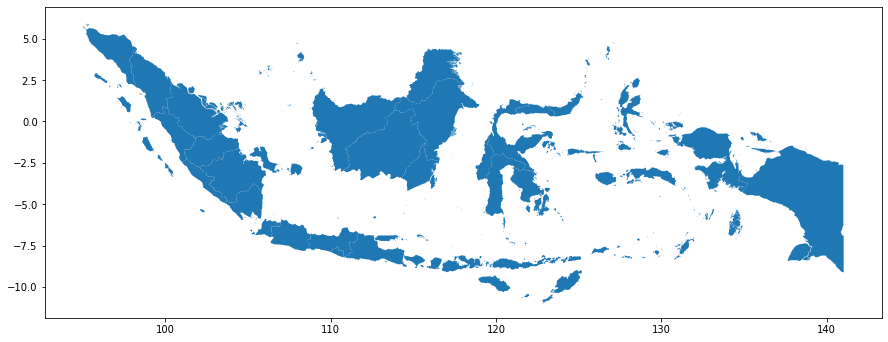

In [30]:
map_df.plot(figsize=(15,15))

In [31]:
map_df.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,27.367364,4.625437,Aceh,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0..."
1,6.026648,0.458717,Bali,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ..."
2,9.279900,0.764911,Banten,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,11.653771,1.630129,Bengkulu,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ..."
4,3.341561,0.260130,Daerah Istimewa Yogyakarta,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ..."


In [32]:
map_df = map_df.replace("Dki Jakarta","DKI Jakarta")
map_df[map_df['ADM1_EN'] == "DKI Jakarta"]

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
5,3.123689,0.053426,DKI Jakarta,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ..."


In [33]:
merged = map_df.set_index('ADM1_EN').join(df_provinsi.set_index('provinsi'))
merged

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,fid,kodeProvi,kasusPosi,kasusSemb,kasusMeni
ADM1_EN,,,,,,,,,,,,,,,,,
Aceh,27.367364,4.625437,ID11,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.39178 2.03748, 97.39055 2.0...",1.0,11.0,9946.0,8119.0,399.0
Bali,6.026648,0.458717,ID51,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((115.12509 -8.84761, 115.12499 ...",17.0,51.0,40844.0,38104.0,1174.0
Banten,9.279900,0.764911,ID36,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",16.0,36.0,44371.0,42176.0,1166.0
Bengkulu,11.653771,1.630129,ID17,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((102.38616 -5.47144, 102.38626 ...",7.0,17.0,5577.0,5130.0,157.0
Daerah Istimewa Yogyakarta,3.341561,0.260130,ID34,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((110.81980 -8.20358, 110.81951 ...",14.0,34.0,34511.0,28799.0,834.0
DKI Jakarta,3.123689,0.053426,ID31,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ...",11.0,31.0,387476.0,375002.0,6379.0
Gorontalo,11.013243,0.977600,ID75,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((121.42536 0.41243, 121.42355 0...",29.0,75.0,5209.0,4869.0,150.0
Jambi,11.835073,3.977711,ID15,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((104.40714 -0.86371, 104.40590 ...",5.0,15.0,6465.0,5178.0,95.0
Jawa Barat,11.605868,3.032785,ID32,None,None,None,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((108.68501 -6.76990, 108.68411 ...",12.0,32.0,254419.0,225732.0,3318.0


# Indonesia

<ipython-input-34-a69bd50aa5ac>:14: MatplotlibDeprecationWarning:


The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.



Text(0.5, 1.0, 'COVID-19 Indonesia\nPersebaran Kasus Positif')

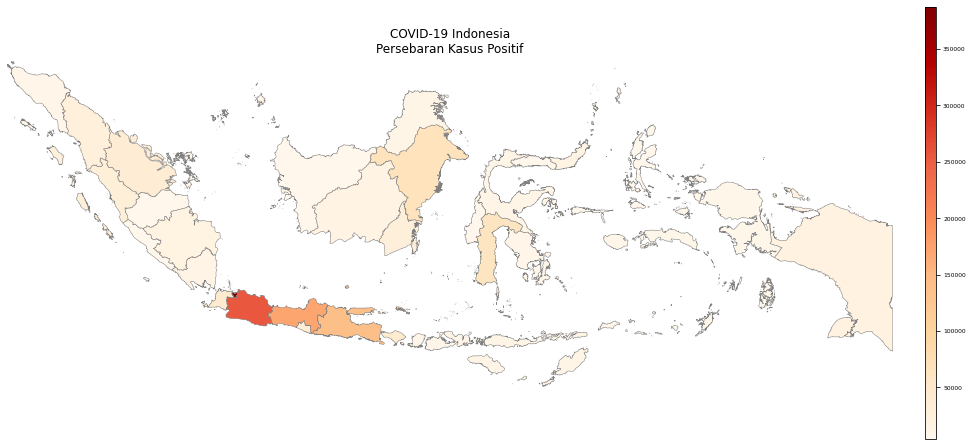

In [34]:
positive = 'kasusPosi'
min_pos = merged['kasusPosi'].min()
max_pos = merged['kasusPosi'].max()

fig5 = plt.figure(figsize=(15,15))
ax = fig5.add_axes([0, 0, 1, 1])
ax.axis('off')
fig5.set_facecolor("#ffffff")
fig5.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig5.transFigure)
w,h = fig5.get_size_inches()
fig5.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=positive, cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig5.colorbar(plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=min_pos, vmax=max_pos)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('COVID-19 Indonesia\nPersebaran Kasus Positif', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})

# Jakarta

<ipython-input-35-1f1dd939bbd5>:16: MatplotlibDeprecationWarning:


The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.



Text(0.5, 1.0, 'COVID-19 Indonesia\nPersebaran Kasus Positif')

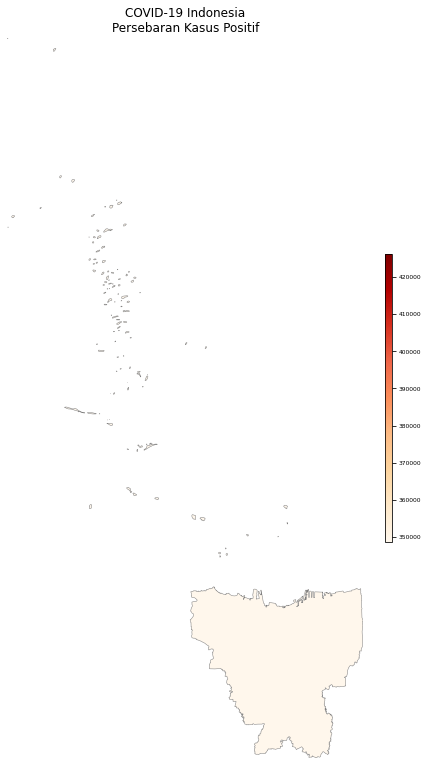

In [35]:
positive = 'kasusPosi'
merged = map_df[map_df['ADM1_EN'] == "DKI Jakarta"]
merged = merged.set_index('ADM1_EN').join(df_provinsi.set_index('provinsi'))
min_pos = merged['kasusPosi'].min()
max_pos = merged['kasusPosi'].max()

fig5 = plt.figure(figsize=(10,10))
ax = fig5.add_axes([0, 0, 1, 1])
ax.axis('off')
fig5.set_facecolor("#ffffff")
fig5.patch.set_facecolor("#ffffff")
ax.axis('off')
ax.margins(0)
ax.apply_aspect()

bbox = ax.get_window_extent().inverse_transformed(fig5.transFigure)
w,h = fig5.get_size_inches()
fig5.set_size_inches(w*bbox.width, h*bbox.height)
merged.plot(column=positive, cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.5')
cbar = fig5.colorbar(plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=min_pos, vmax=max_pos)), orientation="vertical", aspect=40, shrink=0.4, pad=0.03)
cbar.ax.tick_params(labelsize=6)

ax.set_title('COVID-19 Indonesia\nPersebaran Kasus Positif', \
              fontdict={'fontsize': '12',
                        'fontweight' : '3'})

# Note :

See the difference? folium are more interractive rather than geopandas in my perspective

In [36]:
print(merged)

             Shape_Leng  Shape_Area ADM1_PCODE ADM1_REF ADM1ALT1EN ADM1ALT2EN  \
ADM1_EN                                                                         
DKI Jakarta    3.123689    0.053426       ID31     None       None       None   

               ADM0_EN ADM0_PCODE        date     validOn validTo  \
ADM1_EN                                                             
DKI Jakarta  Indonesia         ID  2019-12-20  2020-04-01    None   

                                                      geometry  fid  \
ADM1_EN                                                               
DKI Jakarta  MULTIPOLYGON (((106.87677 -6.10030, 106.87596 ...   11   

             kodeProvi  kasusPosi  kasusSemb  kasusMeni  
ADM1_EN                                                  
DKI Jakarta         31     387476     375002       6379  
